In [233]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [234]:
df = pd.read_csv("C:/Users/Dell/Downloads/survey.csv")
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

## Data Understanding & Cleaning

In [236]:
df.isnull().sum()*100/df.shape[0]

Timestamp                     0.000000
Age                           0.000000
Gender                        0.000000
Country                       0.000000
state                        40.905481
self_employed                 1.429706
family_history                0.000000
treatment                     0.000000
work_interfere               20.969023
no_employees                  0.000000
remote_work                   0.000000
tech_company                  0.000000
benefits                      0.000000
care_options                  0.000000
wellness_program              0.000000
seek_help                     0.000000
anonymity                     0.000000
leave                         0.000000
mental_health_consequence     0.000000
phys_health_consequence       0.000000
coworkers                     0.000000
supervisor                    0.000000
mental_health_interview       0.000000
phys_health_interview         0.000000
mental_vs_physical            0.000000
obs_consequence          

In [237]:
df=df.drop('comments',axis=1)

In [238]:
df.state.value_counts()

CA    138
WA     70
NY     57
TN     45
TX     44
OH     30
IL     29
OR     29
PA     29
IN     27
MI     22
MN     21
MA     20
FL     15
NC     14
VA     14
WI     12
GA     12
MO     12
UT     11
CO      9
MD      8
AL      8
AZ      7
OK      6
NJ      6
KY      5
SC      5
IA      4
CT      4
DC      4
NV      3
VT      3
SD      3
KS      3
NH      3
WY      2
NM      2
NE      2
WV      1
ID      1
MS      1
RI      1
LA      1
ME      1
Name: state, dtype: int64

In [239]:
df.Country.value_counts()

United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Thailand  

##### I chose to discard these two features. because most of them are from the United States, creating a bias;  there are too many different categories, making it difficult to encode the information efficiently.

In [240]:
df = df.drop('Country', axis=1)

In [241]:
df = df.drop('state', axis=1)

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   self_employed              1241 non-null   object
 4   family_history             1259 non-null   object
 5   treatment                  1259 non-null   object
 6   work_interfere             995 non-null    object
 7   no_employees               1259 non-null   object
 8   remote_work                1259 non-null   object
 9   tech_company               1259 non-null   object
 10  benefits                   1259 non-null   object
 11  care_options               1259 non-null   object
 12  wellness_program           1259 non-null   object
 13  seek_help                  1259 non-null   object
 14  anonymit

#### Timestamp is not important 

In [243]:
df = df.drop('Timestamp', axis=1)

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   object
 2   self_employed              1241 non-null   object
 3   family_history             1259 non-null   object
 4   treatment                  1259 non-null   object
 5   work_interfere             995 non-null    object
 6   no_employees               1259 non-null   object
 7   remote_work                1259 non-null   object
 8   tech_company               1259 non-null   object
 9   benefits                   1259 non-null   object
 10  care_options               1259 non-null   object
 11  wellness_program           1259 non-null   object
 12  seek_help                  1259 non-null   object
 13  anonymity                  1259 non-null   object
 14  leave   

#### Deal with age

In [245]:
df['Age'].value_counts()

 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 40             33
 39             33
 43             28
 22             21
 41             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 48              6
 50              6
 20              6
 51              5
 49              4
 56              4
 57              3
 54              3
 55              3
 47              2
 60              2
 99999999999     1
 5               1
-1               1
 11              1
 8               1
 61              1
 53              1
-29              1
-1726            1
 65              1
 62              1
 58              1
 329             1
 72         

In [246]:
df['Age'].median()

31.0

In [247]:
df['Age'] = df['Age'].replace([99999999999,5,-1,11,8,-29,-1726,329], 31)

In [248]:
df['Age'].value_counts()

29    85
32    82
26    75
31    75
27    71
33    70
28    68
34    65
30    63
25    61
35    55
23    51
24    46
37    43
38    39
36    37
39    33
40    33
43    28
41    21
22    21
42    20
21    16
45    12
46    12
44    11
19     9
18     7
48     6
50     6
20     6
51     5
49     4
56     4
55     3
57     3
54     3
47     2
60     2
58     1
62     1
65     1
53     1
61     1
72     1
Name: Age, dtype: int64

#### Deal with Gender

In [249]:
df.Gender.value_counts()

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter                      

In [250]:
df["Gender"]=df["Gender"].replace("f","female")
df["Gender"]=df["Gender"].replace("m","male")
df["Gender"]=df["Gender"].replace("Female","female")
df["Gender"]=df["Gender"].replace("Male","male")
df["Gender"]=df["Gender"].replace("F","female")
df["Gender"]=df["Gender"].replace("M","male")
df["Gender"]=df["Gender"].replace("maile","male")
df["Gender"]=df["Gender"].replace("Male-ish","male")
df["Gender"]=df["Gender"].replace("women","female")
df["Gender"]=df["Gender"].replace("Women","female")
df["Gender"]=df["Gender"].replace("women","female")
df["Gender"]=df["Gender"].replace("Mail","male")
df["Gender"]=df["Gender"].replace("Man","male")
df["Gender"]=df["Gender"].replace("Make","male")
df["Gender"]=df["Gender"].replace("Cis Female","female")
df["Gender"]=df["Gender"].replace("Cis Male","male")
df["Gender"]=df["Gender"].replace("Male (CIS)","male")
df["Gender"]=df["Gender"].replace("Female (cis)","female")
df["Gender"]=df["Gender"].replace("Mal","male")
df["Gender"]=df["Gender"].replace("Femake","female")
df["Gender"]=df["Gender"].replace("woman","female")
df["Gender"]=df["Gender"].replace("cis male","male")
df["Gender"]=df["Gender"].replace("Cis Man","male")
df["Gender"]=df["Gender"].replace("femail","female")
df["Gender"]=df["Gender"].replace("Female ","female")
df["Gender"]=df["Gender"].replace("Male ","male")
df["Gender"]=df["Gender"].replace("msle","male")
df["Gender"]=df["Gender"].replace("Malr","male")
df["Gender"]=df["Gender"].replace("Woman","female")

In [251]:
df['Gender'] = np.where((df['Gender'] != 'female')&(df['Gender'] != 'male'), 'other',df['Gender'])

In [252]:
df['Gender'].value_counts()

male      991
female    246
other      22
Name: Gender, dtype: int64

#### Deal with self_employed

In [253]:
df['self_employed'].value_counts()

No     1095
Yes     146
Name: self_employed, dtype: int64

In [254]:
df[df.self_employed.isnull()]

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,female,NaN,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,male,NaN,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,male,NaN,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,male,NaN,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,male,NaN,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
5,33,male,NaN,Yes,No,Sometimes,6-25,No,Yes,Yes,...,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No
6,35,female,NaN,Yes,Yes,Sometimes,1-5,Yes,Yes,No,...,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No
7,39,male,NaN,No,No,Never,1-5,Yes,Yes,No,...,Yes,Don't know,No,No,No,No,No,No,No,No
8,42,female,NaN,Yes,Yes,Sometimes,100-500,No,Yes,Yes,...,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No
9,23,male,NaN,No,No,Never,26-100,No,Yes,Don't know,...,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No


In [255]:
df['self_employed'].fillna(df['self_employed'].mode(),inplace=True)

In [256]:
df['self_employed'].isnull().sum()

17

#### Deal with work_interfere

In [257]:
df['work_interfere'].value_counts()

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

In [258]:
df[df['work_interfere'].isnull()]

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
19,36,male,Yes,Yes,No,NaN,6-25,Yes,Yes,No,...,Yes,Somewhat easy,No,No,Some of them,Some of them,Maybe,Maybe,Don't know,No
26,33,male,No,No,No,NaN,1-5,No,Yes,Don't know,...,Don't know,Don't know,Maybe,Maybe,Some of them,No,No,No,Don't know,No
37,38,male,No,No,No,NaN,100-500,No,Yes,No,...,Don't know,Somewhat easy,Maybe,No,Some of them,Some of them,No,Maybe,No,No
38,50,male,No,No,No,NaN,100-500,No,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No
41,35,male,No,No,No,NaN,More than 1000,Yes,Yes,Yes,...,Don't know,Somewhat difficult,Yes,Yes,Some of them,No,No,Maybe,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226,39,male,No,No,No,NaN,More than 1000,No,No,Yes,...,Don't know,Somewhat easy,Maybe,Maybe,No,Some of them,No,No,Yes,No
1229,39,male,No,No,No,NaN,6-25,Yes,Yes,No,...,Yes,Don't know,Yes,No,No,No,No,No,Don't know,No
1244,32,female,No,No,No,NaN,More than 1000,No,No,No,...,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Yes,No,No
1254,26,male,No,No,Yes,NaN,26-100,No,Yes,No,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No


In [259]:
df['work_interfere'].fillna('Do not know',inplace=True)

In [260]:
df['work_interfere'].value_counts()

Sometimes      465
Do not know    264
Never          213
Rarely         173
Often          144
Name: work_interfere, dtype: int64

In [261]:
df['work_interfere'].isnull().sum()

0

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   object
 2   self_employed              1242 non-null   object
 3   family_history             1259 non-null   object
 4   treatment                  1259 non-null   object
 5   work_interfere             1259 non-null   object
 6   no_employees               1259 non-null   object
 7   remote_work                1259 non-null   object
 8   tech_company               1259 non-null   object
 9   benefits                   1259 non-null   object
 10  care_options               1259 non-null   object
 11  wellness_program           1259 non-null   object
 12  seek_help                  1259 non-null   object
 13  anonymity                  1259 non-null   object
 14  leave   

# EDA

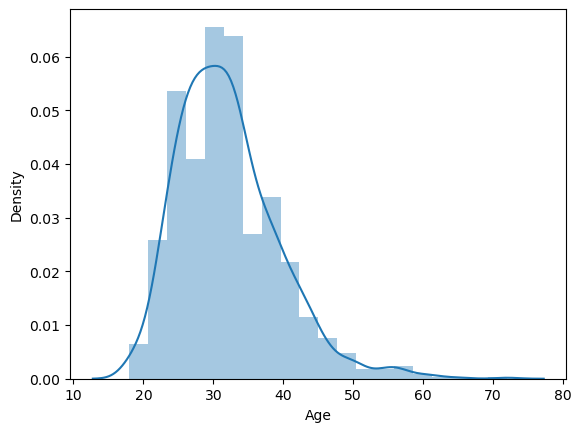

In [263]:
sns.distplot(df.Age,bins=20)
plt.show()

<AxesSubplot:xlabel='Age', ylabel='count'>

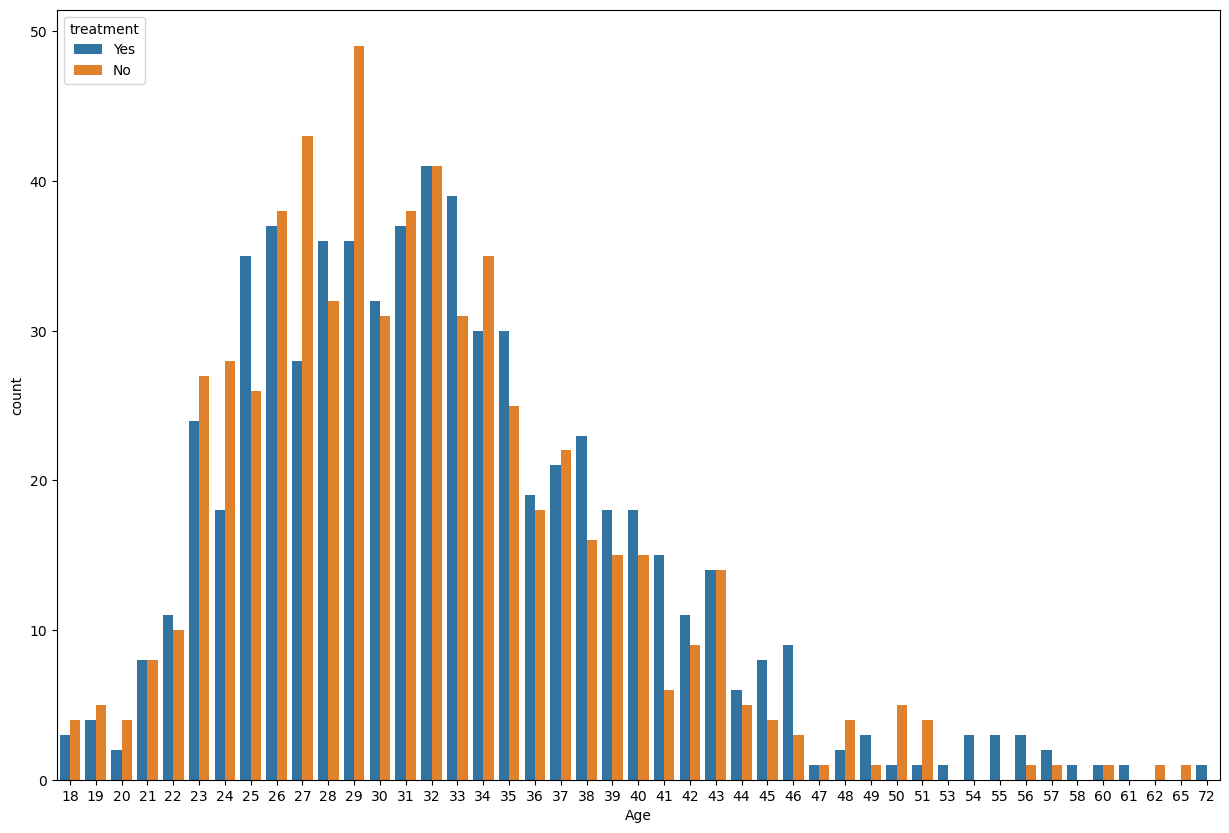

In [264]:
plt.figure(figsize=(15,10))
sns.countplot(data=df, x='Age', hue='treatment')

<AxesSubplot:xlabel='Gender', ylabel='count'>

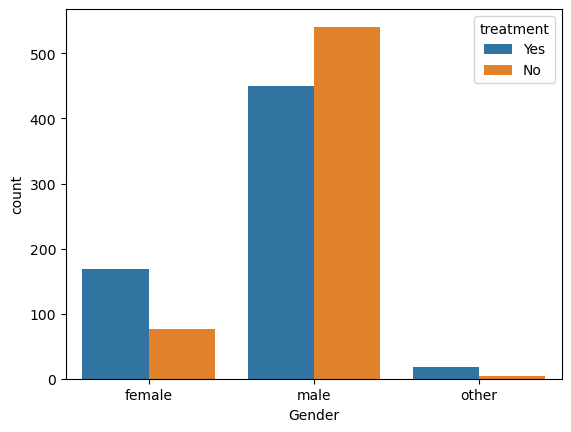

In [265]:
# Gender 
sns.countplot(data=df,x='Gender',hue='treatment')

<AxesSubplot:ylabel='self_employed'>

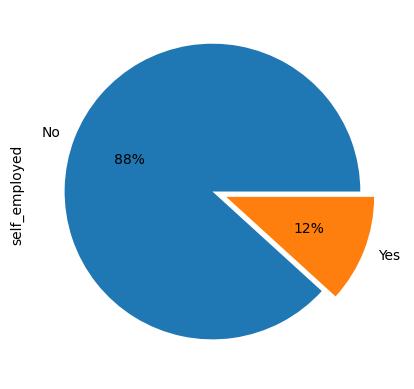

In [266]:
# self_employed
df['self_employed'].value_counts().plot.pie(autopct='%1.0f%%',explode=(0.05,0.05))

<AxesSubplot:xlabel='self_employed', ylabel='count'>

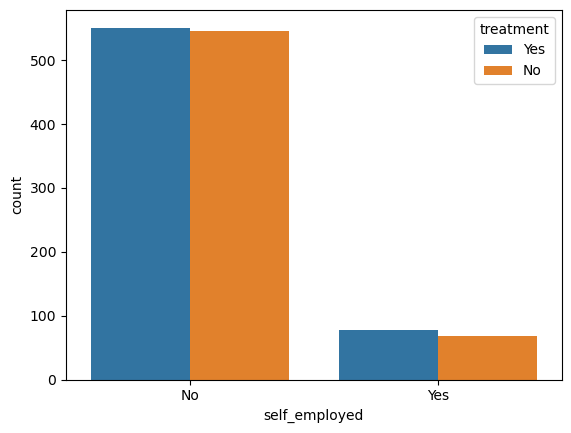

In [267]:
sns.countplot(data=df,x='self_employed',hue='treatment')

No     767
Yes    492
Name: family_history, dtype: int64


<AxesSubplot:xlabel='family_history', ylabel='count'>

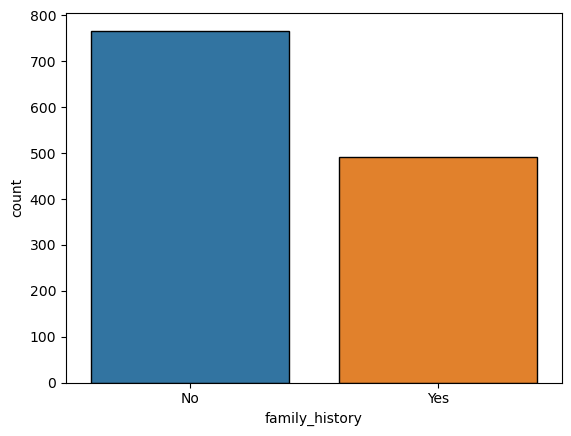

In [268]:
# family history
print(df['family_history'].value_counts())
sns.countplot(x="family_history",data=df,edgecolor="black")

Sometimes      465
Do not know    264
Never          213
Rarely         173
Often          144
Name: work_interfere, dtype: int64


<AxesSubplot:xlabel='work_interfere', ylabel='count'>

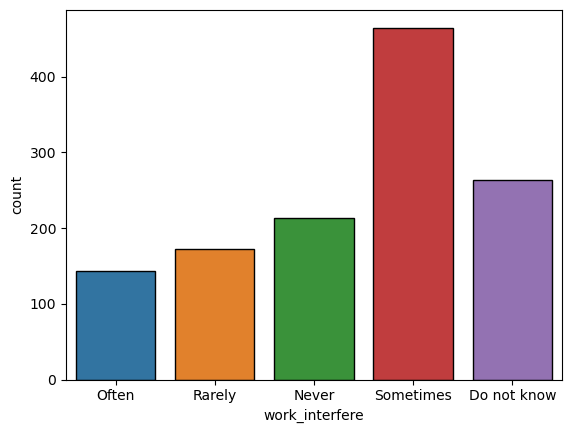

In [269]:
# work interfere
print(df['work_interfere'].value_counts())
sns.countplot(data=df, x='work_interfere', edgecolor="black")

No     883
Yes    376
Name: remote_work, dtype: int64


<AxesSubplot:xlabel='remote_work', ylabel='count'>

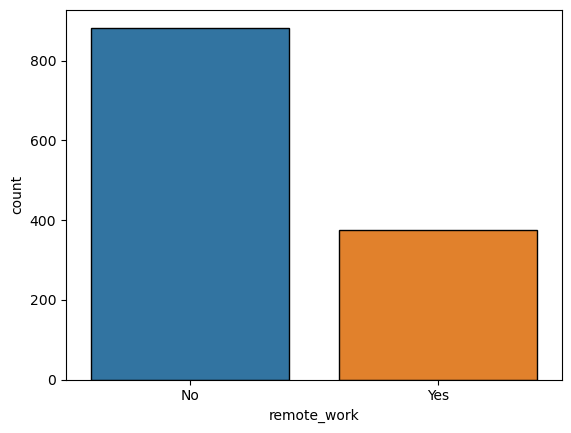

In [270]:
# remote work
print(df['remote_work'].value_counts())
sns.countplot(data=df, x='remote_work', edgecolor="black")

<AxesSubplot:xlabel='remote_work', ylabel='count'>

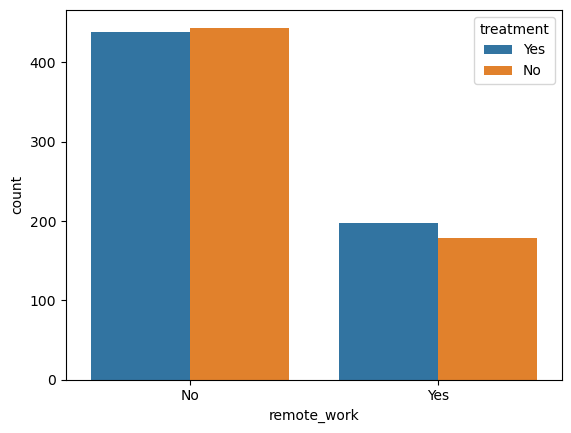

In [271]:
sns.countplot(data=df,x="remote_work",hue="treatment")

<AxesSubplot:ylabel='tech_company'>

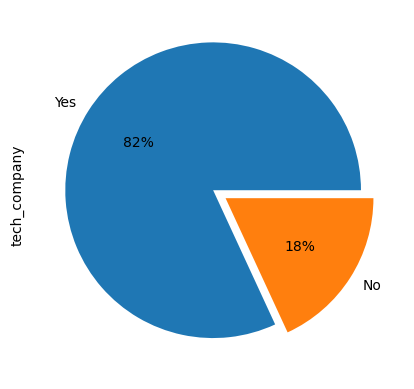

In [272]:
# tech company
df['tech_company'].value_counts().plot.pie(autopct='%1.0f%%',explode=(0.05,0.05))

<AxesSubplot:xlabel='tech_company', ylabel='count'>

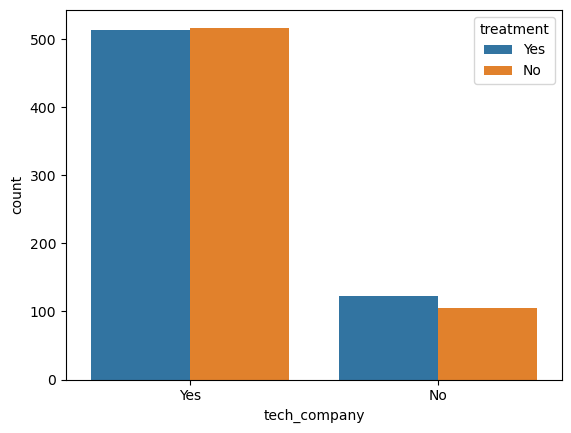

In [273]:
sns.countplot(data=df,x='tech_company',hue='treatment')

# Feature engineering

In [274]:
df['treatment'].value_counts()

Yes    637
No     622
Name: treatment, dtype: int64

In [275]:
df['treatment'] = df['treatment'].replace(['Yes'],1)
df['treatment'] = df['treatment'].replace(['No'],0)

In [276]:
df['treatment'].value_counts()

1    637
0    622
Name: treatment, dtype: int64

# Dummy variable

In [277]:
cat_var =['Gender', 'self_employed', 'family_history',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']

In [278]:
dummy = pd.get_dummies(df[cat_var],drop_first=True)
df = pd.concat([df,dummy],axis=1)

In [279]:
df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_Yes
0,37,female,No,No,1,Often,6-25,No,Yes,Yes,...,0,0,1,1,0,0,0,0,1,0
1,44,male,NaN,No,0,Rarely,More than 1000,No,No,Don't know,...,0,0,0,1,0,1,0,0,0,0
2,32,male,NaN,No,0,Rarely,6-25,No,Yes,No,...,1,0,1,0,1,0,1,1,0,0
3,31,male,NaN,Yes,1,Often,26-100,No,Yes,No,...,0,0,0,0,0,0,0,1,0,1
4,31,male,NaN,No,0,Never,100-500,Yes,Yes,Yes,...,0,0,1,0,1,0,1,0,0,0


In [280]:
df = df.drop(cat_var,axis=1)

In [281]:
df.head()

,Age,treatment,Gender_male,Gender_other,self_employed_Yes,family_history_Yes,work_interfere_Never,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,...,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_Yes
0,37,1,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0
1,44,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
2,32,0,1,0,0,0,0,0,1,0,...,1,0,1,0,1,0,1,1,0,0
3,31,1,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
4,31,0,1,0,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,0,0


# Model Building

In [282]:
from sklearn.model_selection import train_test_split

In [283]:
x = df.drop('treatment',axis=1)
x.head()

,Age,Gender_male,Gender_other,self_employed_Yes,family_history_Yes,work_interfere_Never,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,no_employees_100-500,...,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_Yes
0,37,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1,44,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
2,32,1,0,0,0,0,0,1,0,0,...,1,0,1,0,1,0,1,1,0,0
3,31,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,31,1,0,0,0,1,0,0,0,1,...,0,0,1,0,1,0,1,0,0,0


In [284]:
y = df['treatment']

y.head()

0    1
1    0
2    0
3    1
4    0
Name: treatment, dtype: int64

In [285]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, test_size=0.3, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(881, 45)
(378, 45)
(881,)
(378,)


# Outlier treatment

In [286]:
from sklearn.preprocessing import StandardScaler

In [287]:
num = ['Age']

In [288]:
scaler = StandardScaler()
x_train[num] = scaler.fit_transform(x_train[num])
x_train.head()

,Age,Gender_male,Gender_other,self_employed_Yes,family_history_Yes,work_interfere_Never,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,no_employees_100-500,...,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_Yes
380,1.222330,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
227,0.252299,1,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
451,1.083754,0,1,0,1,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
578,-0.440580,1,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
1197,0.252299,1,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0


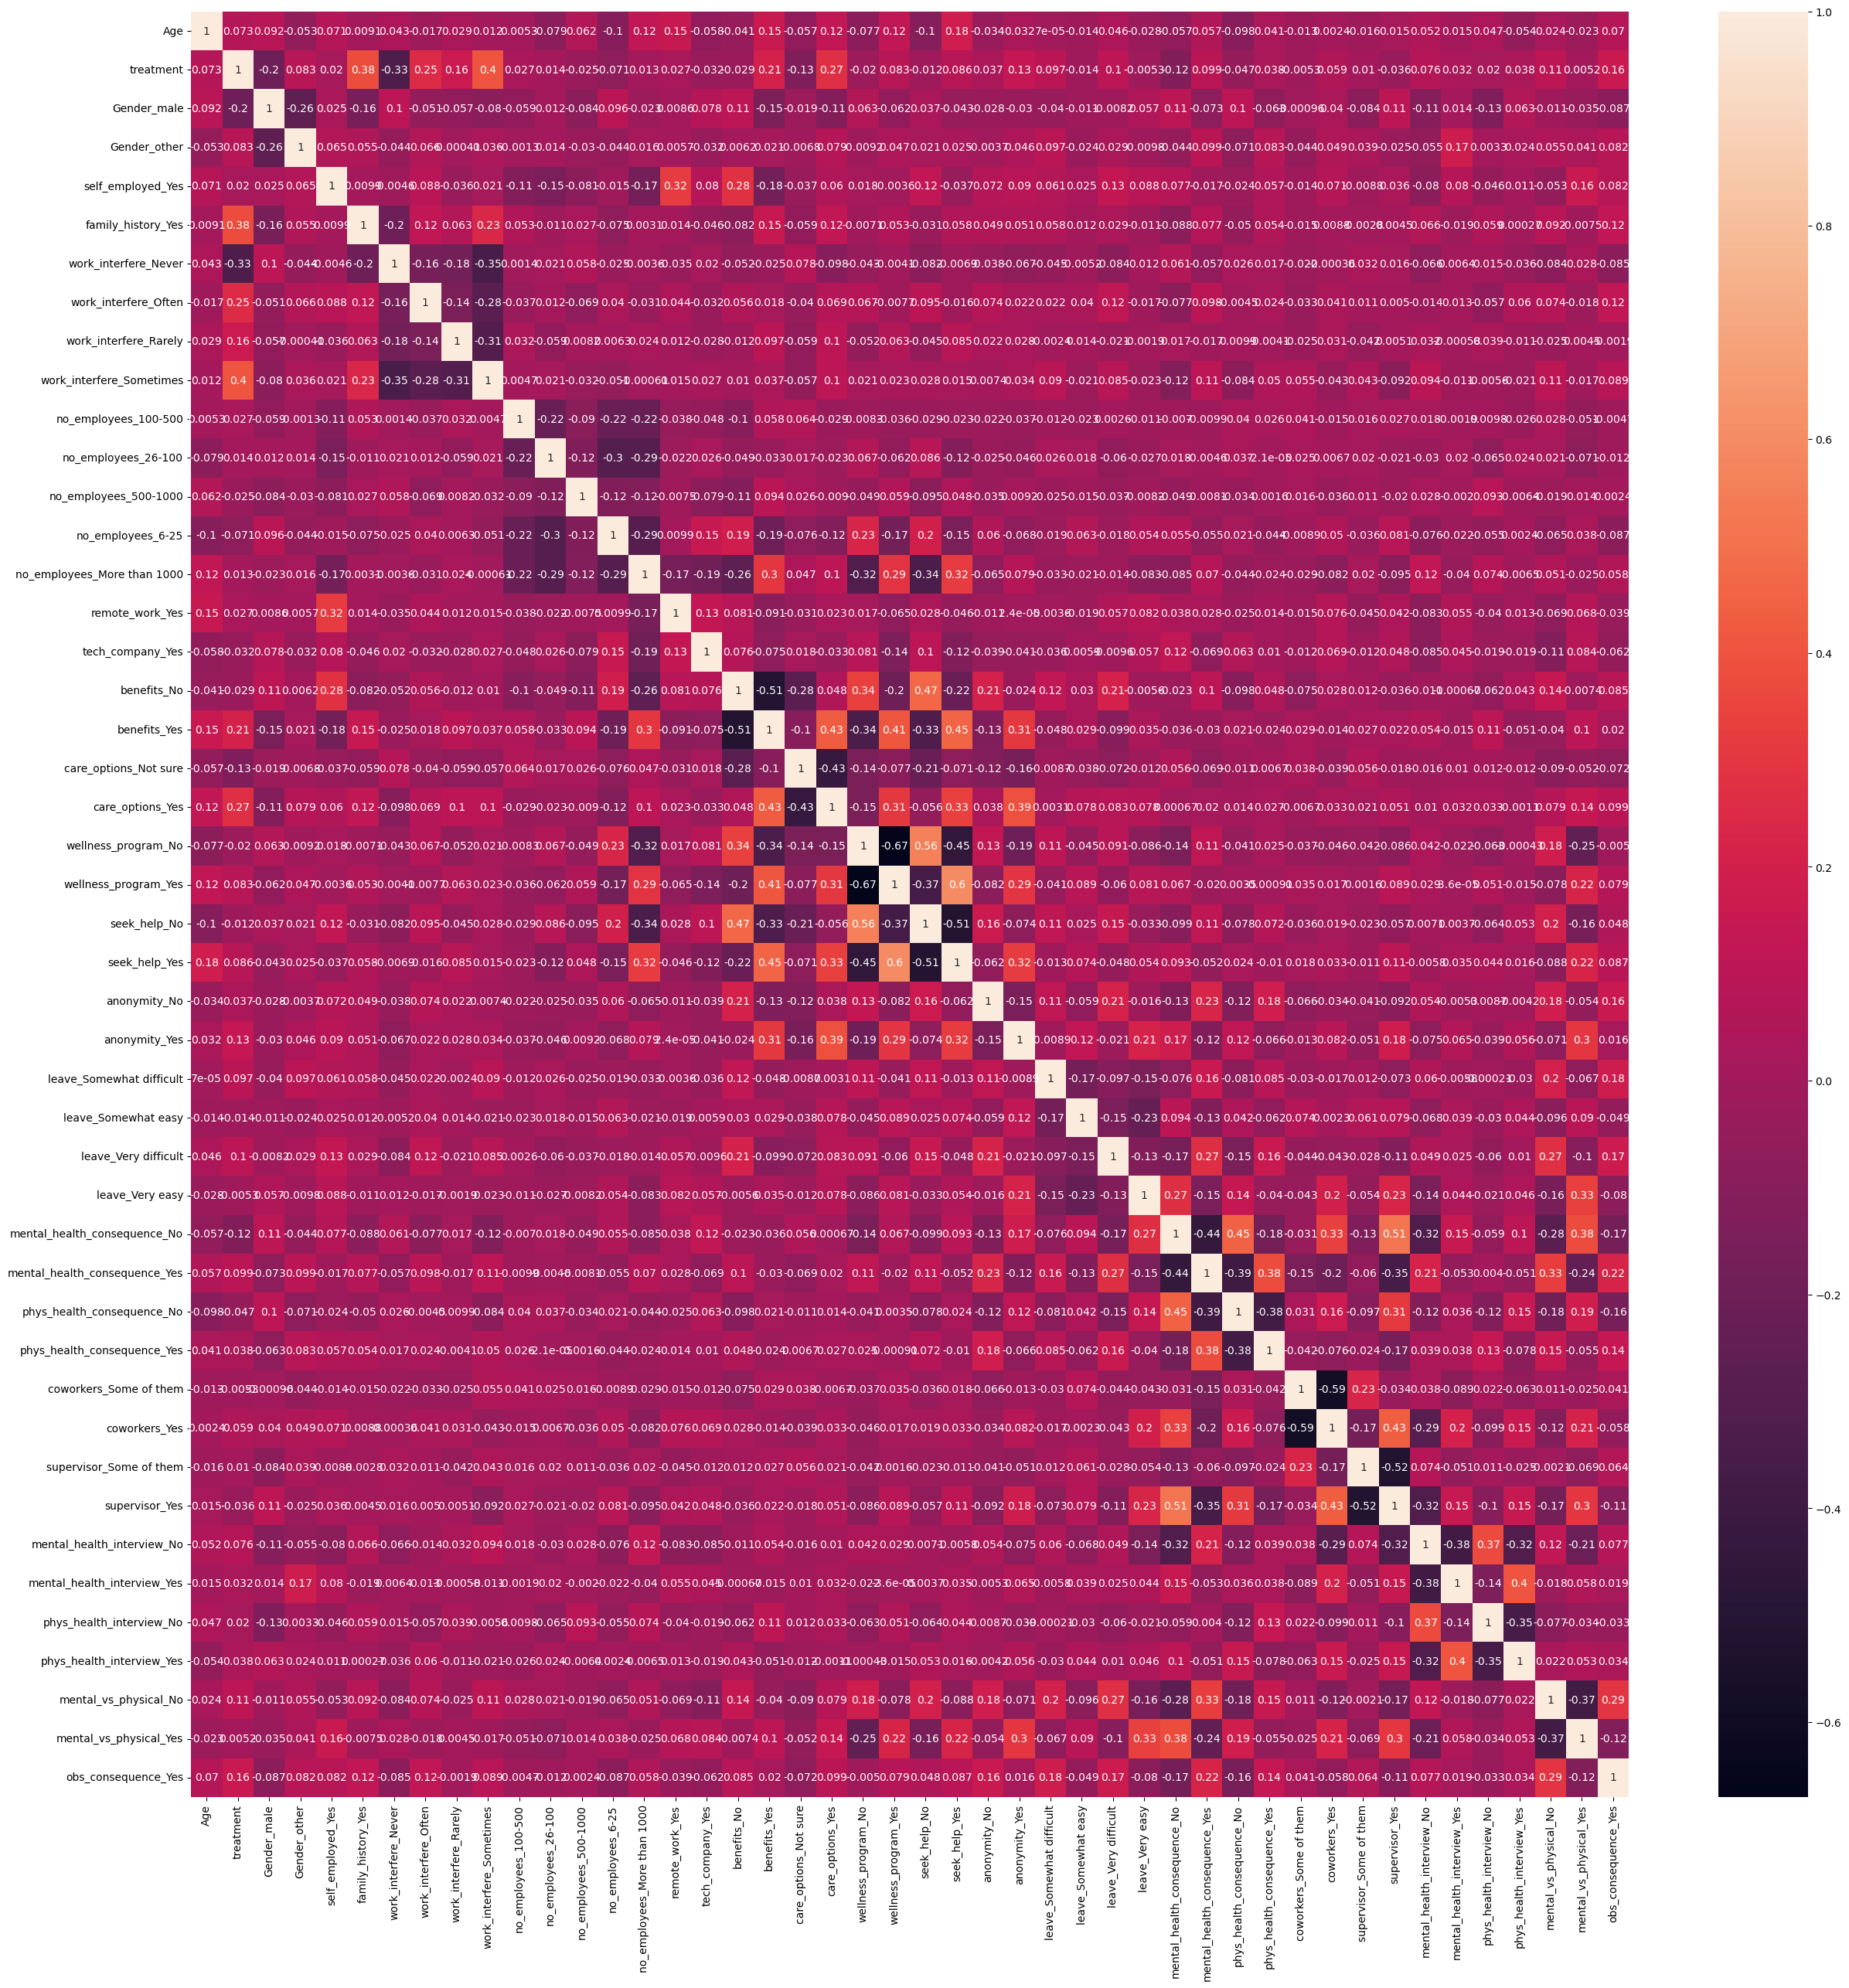

In [289]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)
plt.show()

### Running Your First Training Model

### Using Decision Tree

In [290]:
from sklearn.tree import DecisionTreeClassifier

In [291]:
dt_base = DecisionTreeClassifier(random_state=42,max_depth=6)

In [292]:
dt_base.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [293]:
y_train_pred = dt_base.predict(x_train)
y_test_pred = dt_base.predict(x_test)

In [294]:
from sklearn.metrics import classification_report

In [295]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.66      0.50      0.57       181
           1       0.62      0.76      0.69       197

    accuracy                           0.64       378
   macro avg       0.64      0.63      0.63       378
weighted avg       0.64      0.64      0.63       378



#### Plot the roc curve 

In [296]:
from sklearn.metrics import plot_roc_curve

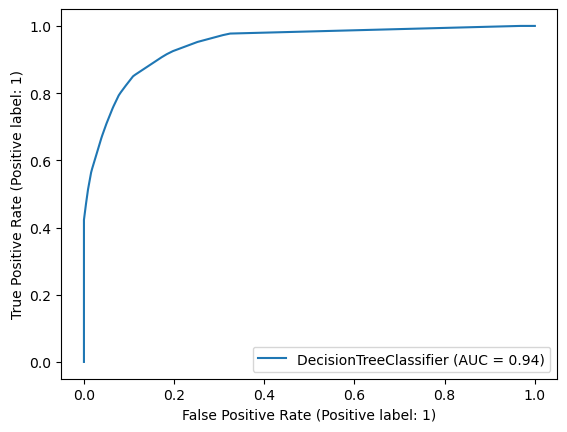

In [297]:
plot_roc_curve(dt_base, x_train, y_train, drop_intermediate=False)
plt.show()

### Hyper-parameter tuning for the Decision Tree

In [298]:
from sklearn.model_selection import GridSearchCV

In [299]:
dt = DecisionTreeClassifier(random_state=42)

In [300]:
params = {
    "max_depth":[2,3,5,10,15,20],
    "min_samples_leaf":[5,10,20,50,100,500]
}

In [301]:
grid_search = GridSearchCV(estimator=dt,
                          param_grid=params,
                          cv=4,
                          n_jobs=-1, verbose=1, scoring="accuracy")

In [302]:
%%time
grid_search.fit(x_train,y_train)

Fitting 4 folds for each of 36 candidates, totalling 144 fits
Wall time: 5.41 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 15, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='accuracy', verbose=1)

In [303]:
grid_search.best_score_

0.8161559029206088

In [304]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=42)

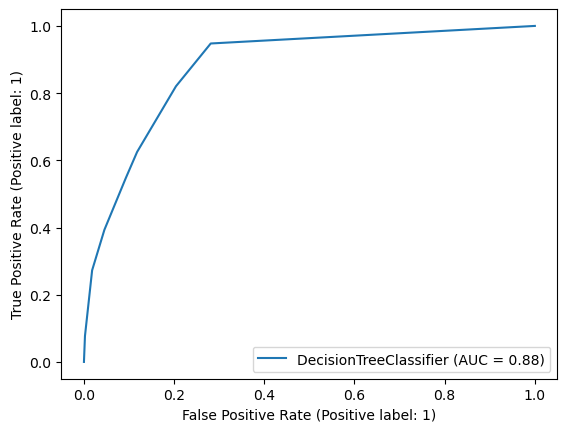

In [305]:
plot_roc_curve(dt_best, x_train, y_train)
plt.show()

# Using Random Forest

In [306]:
from sklearn.ensemble import RandomForestClassifier

In [307]:
rf = RandomForestClassifier(n_estimators = 10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [308]:
%%time
rf.fit(x_train, y_train)

Wall time: 50.2 ms


RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [309]:
rf.oob_score_

0.6980703745743473

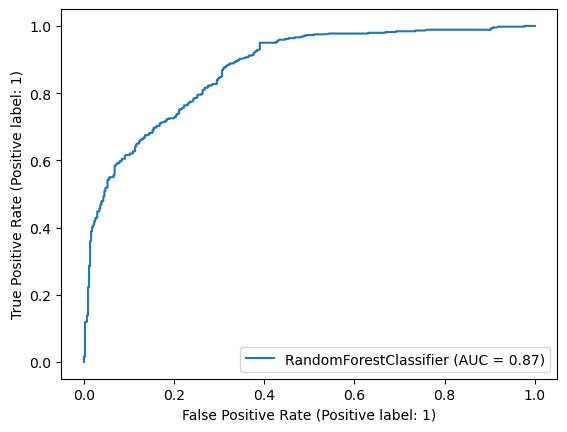

In [310]:
plot_roc_curve(rf,x_train,y_train)

### Hyper-parameter tuning for the Random Forest

In [311]:
rf = RandomForestClassifier(random_state=42,n_jobs=-1)

In [312]:
params = {
    "max_depth":[2,3,5,10,20],
    "min_samples_leaf":[5,10,20,50,100,200],
    "n_estimators":[10, 25, 50, 100]
}

In [313]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [314]:
%%time
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits
Wall time: 19.6 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [315]:
grid_search.best_score_

0.818444055944056

In [316]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=50,
                       n_jobs=-1, random_state=42)

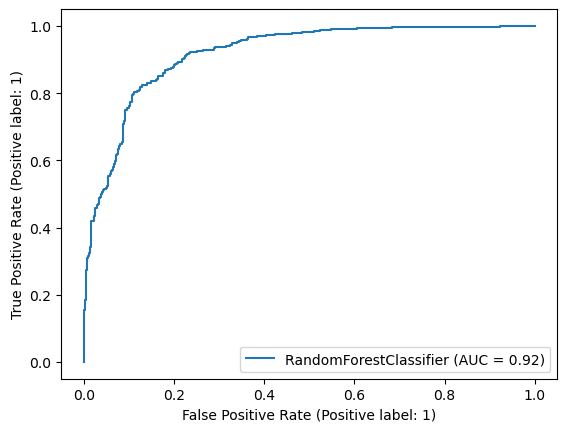

In [317]:
plot_roc_curve(rf_best, x_train, y_train)
plt.show()

In [318]:
rf_best.feature_importances_

array([0.03444741, 0.03244643, 0.        , 0.00264385, 0.16000674,
       0.09642301, 0.07272863, 0.04448933, 0.25619191, 0.00129189,
       0.0069925 , 0.00039285, 0.00359101, 0.00531915, 0.0070537 ,
       0.00168208, 0.00904845, 0.03434795, 0.00949726, 0.08005061,
       0.0069168 , 0.00400752, 0.00534695, 0.0074138 , 0.00086837,
       0.0108209 , 0.00421389, 0.00605348, 0.0023758 , 0.00093494,
       0.00868941, 0.0080125 , 0.00358709, 0.0003065 , 0.01111732,
       0.0042923 , 0.00509178, 0.00875656, 0.00323117, 0.0006417 ,
       0.00640877, 0.00455848, 0.00855765, 0.00478879, 0.01436279])

In [319]:
imp_df = pd.DataFrame({
    "Varname": x_train.columns,
    "Imp": rf_best.feature_importances_
})

In [320]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
8,work_interfere_Sometimes,0.256192
4,family_history_Yes,0.160007
5,work_interfere_Never,0.096423
19,care_options_Yes,0.080051
6,work_interfere_Often,0.072729
7,work_interfere_Rarely,0.044489
0,Age,0.034447
17,benefits_Yes,0.034348
1,Gender_male,0.032446
44,obs_consequence_Yes,0.014363
